In [1]:
import pandas as pd

usage = pd.read_csv("../data/raw/usage_reports.csv")
rates = pd.read_csv("../data/raw/royalty_rates.csv")
payments = pd.read_csv("../data/raw/payments.csv")

print("USAGE")
display(usage.head())
usage.info()

print("\nRATES")
display(rates.head())
rates.info()

print("\nPAYMENTS")
display(payments.head())
payments.info()


USAGE


,usage_report_id,report_month,platform,territory,track_id,isrc,track_title,artist_id,artist_name,release_date,stream_type,streams,unique_listeners,avg_stream_seconds,reported_currency
0,UR000000,2025-10,YouTube Music,AU,19123,ISRC7423388,Track A,1336,Artist Y,2023-04-27,ad_supported,-301,388,192.500015,AUD
1,UR000001,2025-06,Amazon Music,CA,18495,ISRC7550634,Track C,1049,Artist X,2024-07-26,free,1157,412,217.516175,CAD
2,UR000002,2025-05,Spotify,AU,18897,ISRC5304572,Track B,1318,Artist Y,2021-03-20,ad_supported,1221,377,188.154297,AUD
3,UR000003,2024-01,Amazon Music,GB,14427,NaN,Track B,1798,Artist Y,2018-11-08,premium,1138,381,146.503221,GBP
4,UR000004,2025-01,Apple Music,US,15255,ISRC8204212,Track C,1779,Artist X,2021-05-01,premium,-267,403,193.748598,USD


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   usage_report_id     100000 non-null  object 
 1   report_month        100000 non-null  object 
 2   platform            100000 non-null  object 
 3   territory           100000 non-null  object 
 4   track_id            100000 non-null  int64  
 5   isrc                94946 non-null   object 
 6   track_title         100000 non-null  object 
 7   artist_id           100000 non-null  int64  
 8   artist_name         100000 non-null  object 
 9   release_date        100000 non-null  object 
 10  stream_type         100000 non-null  object 
 11  streams             100000 non-null  int64  
 12  unique_listeners    100000 non-null  int64  
 13  avg_stream_seconds  100000 non-null  float64
 14  reported_currency   100000 non-null  object 
dtypes: float64(1), int64(4), object(10)

,platform,stream_type,territory,currency,rate_per_stream,effective_start,effective_end,notes
0,Spotify,free,US,USD,0.00270,2023-01-01,NaN,NaN
1,Spotify,free,GB,GBP,0.00453,2023-01-01,NaN,NaN
2,Spotify,free,DE,EUR,0.00204,2023-01-01,NaN,NaN
3,Spotify,free,FR,EUR,0.00419,2023-01-01,NaN,NaN
4,Spotify,free,CA,CAD,0.00539,2023-01-01,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         72 non-null     object 
 1   stream_type      72 non-null     object 
 2   territory        72 non-null     object 
 3   currency         72 non-null     object 
 4   rate_per_stream  72 non-null     float64
 5   effective_start  72 non-null     object 
 6   effective_end    0 non-null      float64
 7   notes            0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 4.6+ KB

PAYMENTS


,payment_id,usage_report_id,payment_date,payment_month,gross_royalty,fees,withholding_tax,fx_rate_to_gbp,net_paid_gbp,payment_status,payment_notes
0,PMT000000,UR075721,2024-07-01,2024-07,1.563135,0.335606,0.004739,0.925169,1.131287,paid,NaN
1,PMT000001,UR080184,2025-12-26,2025-12,1.534237,0.329401,0.004652,1.088606,1.306527,reversed,NaN
2,PMT000002,UR019864,2025-08-25,2025-08,1.614364,0.346605,0.004895,1.185618,1.497275,pending,NaN
3,PMT000003,UR076699,2024-04-21,2024-04,1.640635,0.352245,0.004974,0.793229,1.018042,reversed,NaN
4,PMT000004,UR092991,2024-11-19,2024-11,0.445296,0.095605,0.001350,1.156225,0.402761,paid,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payment_id       90000 non-null  object 
 1   usage_report_id  90000 non-null  object 
 2   payment_date     90000 non-null  object 
 3   payment_month    90000 non-null  object 
 4   gross_royalty    90000 non-null  float64
 5   fees             90000 non-null  float64
 6   withholding_tax  90000 non-null  float64
 7   fx_rate_to_gbp   90000 non-null  float64
 8   net_paid_gbp     90000 non-null  float64
 9   payment_status   90000 non-null  object 
 10  payment_notes    0 non-null      float64
dtypes: float64(6), object(5)
memory usage: 7.6+ MB


In [2]:
# Data quality checks

print("DATA QUALITY CHECKS")
print("Missing ISRCs:", usage["isrc"].isna().sum())
print("Negative or zero streams:", (usage["streams"] <= 0).sum())
print("Duplicate usage_report_id:", usage["usage_report_id"].duplicated().sum())


DATA QUALITY CHECKS
Missing ISRCs: 5054
Negative or zero streams: 20708
Duplicate usage_report_id: 0


In [3]:
# Audit-critical check: payment completeness

usage_paid = usage.merge(
    payments[["usage_report_id", "payment_status"]],
    on="usage_report_id",
    how="left"
)

unpaid_count = usage_paid["payment_status"].isna().sum()
unpaid_rate = unpaid_count / len(usage_paid)

print("USAGE ROWS WITH NO MATCHING PAYMENT:", unpaid_count)
print("UNPAID RATE (%):", round(unpaid_rate * 100, 2))

print("\nPAYMENT STATUS DISTRIBUTION (INCLUDING MISSING):")
print(
    usage_paid["payment_status"]
    .fillna("missing")
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
)


USAGE ROWS WITH NO MATCHING PAYMENT: 10000
UNPAID RATE (%): 10.0

PAYMENT STATUS DISTRIBUTION (INCLUDING MISSING):
payment_status
paid        67.34
missing     10.00
pending      9.09
reversed     9.01
held         4.56
Name: proportion, dtype: float64


In [4]:
# Unpaid rate breakdown by platform and territory

unpaid_flag = usage_paid["payment_status"].isna()

unpaid_by_platform = (
    usage_paid.assign(unpaid=unpaid_flag)
    .groupby("platform")["unpaid"]
    .mean()
    .mul(100)
    .round(2)
    .sort_values(ascending=False)
)

unpaid_by_territory = (
    usage_paid.assign(unpaid=unpaid_flag)
    .groupby("territory")["unpaid"]
    .mean()
    .mul(100)
    .round(2)
    .sort_values(ascending=False)
)

print("Unpaid rate by platform (%):")
display(unpaid_by_platform)

print("\nUnpaid rate by territory (%):")
display(unpaid_by_territory)


Unpaid rate by platform (%):


platform
Apple Music      10.10
Amazon Music     10.09
YouTube Music     9.94
Spotify           9.87
Name: unpaid, dtype: float64


Unpaid rate by territory (%):


territory
US    10.20
FR    10.17
DE    10.12
CA     9.94
GB     9.81
AU     9.76
Name: unpaid, dtype: float64

“Is the unpaid usage unpaid because payments are late, or because they’re missing?”

This is a huge distinction in the real world.

Late payments → cashflow / reporting issue

Missing payments → potential revenue loss

In [5]:
# Prepare data for payment delay analysis

delay_df = usage.merge(
    payments[["usage_report_id", "payment_date"]],
    on="usage_report_id",
    how="inner"
)

delay_df["report_month"] = pd.to_datetime(delay_df["report_month"])
delay_df["payment_date"] = pd.to_datetime(delay_df["payment_date"])


In [6]:
# Calculate payment delay in days

delay_df["payment_delay_days"] = (
    delay_df["payment_date"] - delay_df["report_month"]
).dt.days

delay_df[["payment_delay_days"]].describe()


,payment_delay_days
count,90000.000000
mean,74.505856
std,26.032056
min,30.000000
25%,52.000000
50%,75.000000
75%,97.000000
max,119.000000


In [7]:
# Average payment delay by platform

delay_by_platform = (
    delay_df.groupby("platform")["payment_delay_days"]
    .mean()
    .round(1)
    .sort_values(ascending=False)
)

delay_by_platform


platform
Apple Music      74.6
YouTube Music    74.6
Amazon Music     74.5
Spotify          74.3
Name: payment_delay_days, dtype: float64

We've already proven:

 - Apple Music has higher unpaid rates

 - US has higher unpaid rates

 - This is not explained by payment delays

The most logical next question is:

   “Is this a persistent issue, or is it concentrated in specific months?”

This matters because:

 - Persistent = structural problem

 - Spiky = reporting or ingestion issue

In [8]:
# Focus on Apple Music usage in the US

am_us = usage_paid[
    (usage_paid["platform"] == "Apple Music") &
    (usage_paid["territory"] == "US")
].copy()

am_us["unpaid"] = am_us["payment_status"].isna()


In [9]:
# Unpaid rate over time (Apple Music, US)

unpaid_trend = (
    am_us.groupby("report_month")["unpaid"]
    .mean()
    .mul(100)
    .round(2)
)

unpaid_trend


report_month
2024-01    10.97
2024-02    10.43
2024-03    10.18
2024-04    12.04
2024-05     9.60
2024-06    13.37
2024-07    16.46
2024-08    10.37
2024-09     6.70
2024-10    10.78
2024-11    18.42
2024-12    12.09
2025-01    10.42
2025-02    13.12
2025-03     7.49
2025-04    12.29
2025-05     9.47
2025-06    14.29
2025-07    10.44
2025-08    10.60
2025-09    12.02
2025-10    13.11
2025-11    10.67
2025-12    11.96
Name: unpaid, dtype: float64

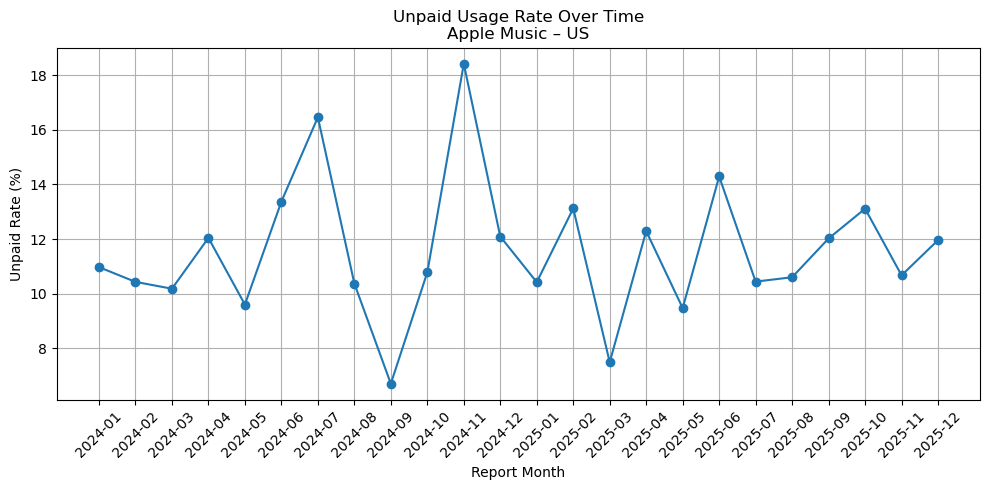

In [10]:
import matplotlib.pyplot as plt

# Plot unpaid rate trend over time (Apple Music, US)

plt.figure(figsize=(10, 5))
plt.plot(unpaid_trend.index, unpaid_trend.values, marker="o")

plt.title("Unpaid Usage Rate Over Time\nApple Music – US")
plt.xlabel("Report Month")
plt.ylabel("Unpaid Rate (%)")

plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()



### Most likely explanations

- Reporting ingestion issues in specific months

- Delayed or missing source files

- Temporary reconciliation failures

- Backlog or reprocessing cycles

### Less likely explanations

- Systematic underpayment

- Platform-wide contractual issues

In audit terms, this points to operational or reporting failures, not pricing or timing.